# Face Swap Application

Install Required Packages

In [49]:
import dlib
import cv2

import matplotlib.pyplot as plt
import numpy as np

Load Scource Image

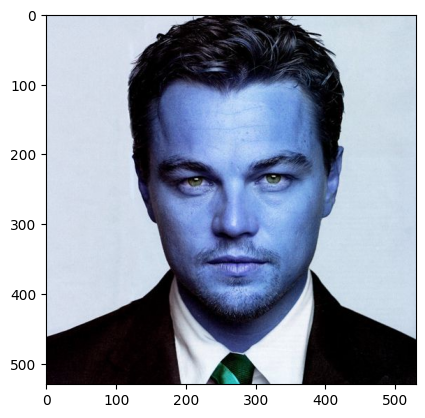

In [50]:
image = cv2.imread('DestinationImage.jpg')
plt.imshow(image)

### Applying Landmarks on Image

In [51]:
face_detector = dlib.get_frontal_face_detector()
point_detector = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [52]:
face_detection = face_detector(image, 1)

In [53]:
face_detection

rectangles[[(141, 171) (409, 439)]]

In [54]:
for face in face_detection:
    points = point_detector(image, face)
    for point in points.parts():
        cv2.circle(image, (point.x, point.y), 2, (255, 0, 0), 2)

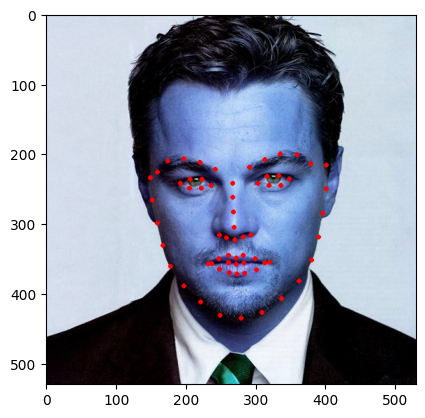

In [55]:
plt.imshow(image)

### Creating Mask

In [56]:
points_list = []

for n in range(0, 68):
    x = points.part(n).x
    y = points.part(n).y
    points_list += [(x,y)]

points = np.array(points_list, np.int32)

In [57]:
points.shape

(68, 2)

In [58]:
convexhull = cv2.convexHull(points=points)

In [59]:
convexhull.shape

(21, 1, 2)

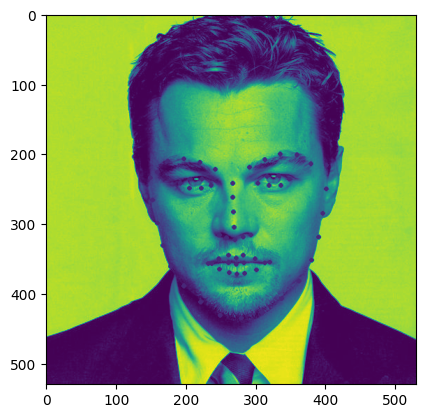

In [60]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [61]:
image.shape

(530, 530, 3)

In [62]:
img_gray.shape

(530, 530)

In [63]:
mask = np.zeros_like(img_gray)

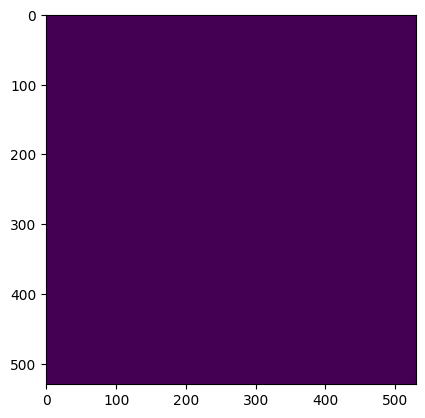

In [64]:
plt.imshow(mask)

In [65]:
cv2.fillConvexPoly(mask, convexhull, 255).shape

(530, 530)

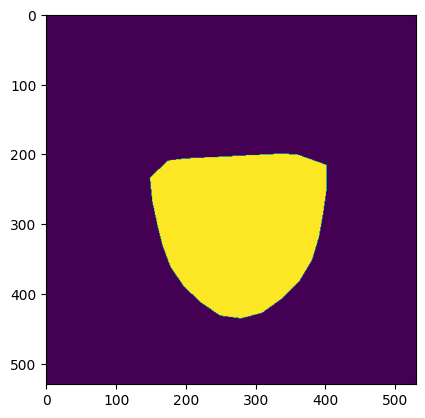

In [66]:
plt.imshow(mask)

### Source Image Landmarks

In [67]:
source = cv2.imread("SourceImage.jpg")
source_grey = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(source_grey)
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
source_faces = face_detector(source_grey)

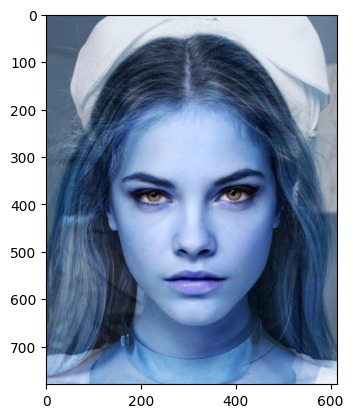

In [68]:
plt.imshow(source)

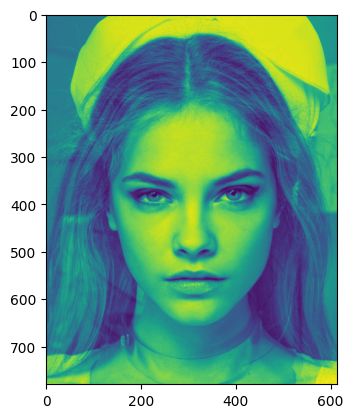

In [69]:
plt.imshow(source_grey)

In [70]:
source_faces

rectangles[[(115, 280) (486, 651)]]

In [71]:
for face in source_faces:
    points = points_detector(source_grey, face)
    points_list = []
    for n in range(0, 68):
        x = points.part(n).x
        y = points.part(n).y
        points_list+=[(x, y)]

    points = np.array(points_list, np.int32)
    convexhull = cv2.convexHull(points)
    cv2.fillConvexPoly(mask, convexhull, 255)
    source_face = cv2.bitwise_and(source, source, mask=mask)

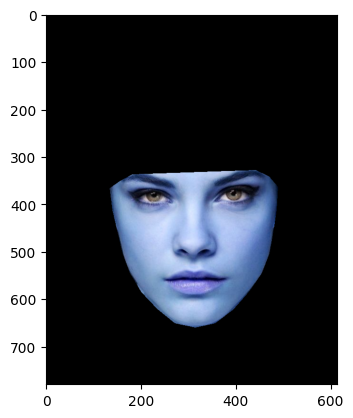

In [72]:
plt.imshow(source_face)

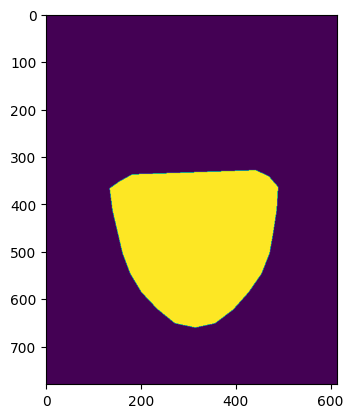

In [73]:
plt.imshow(mask)

In [74]:
rect = cv2.boundingRect(convexhull)
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(points_list)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

In [75]:
# for t in triangles:
#     pt1 = (t[0], t[1])
#     pt2 = (t[2], t[3])
#     pt3 = (t[4], t[5])

#     cv2.line(source, pt1, pt2, (0, 0, 255))
#     cv2.line(source, pt2, pt3, (0, 0, 255))
#     cv2.line(source, pt1, pt3, (0, 0, 255))

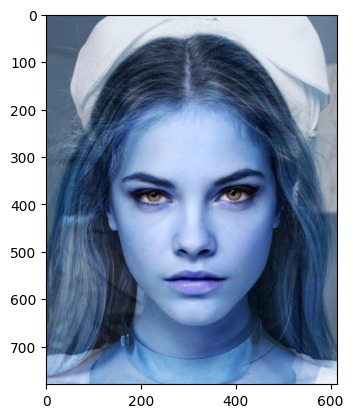

In [76]:
plt.imshow(source)

In [77]:
triangles_id = []

In [78]:
def index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index
for t in triangles:
  pt1 = (t[0], t[1])
  pt2 = (t[2], t[3])
  pt3 = (t[4], t[5])

  id_pt1 = np.where((points == pt1).all(axis=1))
  id_pt1 = index_nparray(id_pt1)
  id_pt2 = np.where((points == pt2).all(axis=1))
  id_pt2 = index_nparray(id_pt2)
  id_pt3 = np.where((points == pt3).all(axis=1))
  id_pt3 = index_nparray(id_pt3)

  if id_pt1 is not None and id_pt2 is not None and id_pt3 is not None:
    triangle = [id_pt1, id_pt2, id_pt3]
    triangles_id.append(triangle)

In [79]:
len(triangles_id)

111

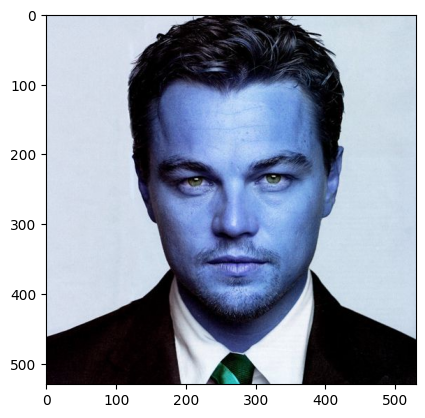

In [80]:
destination = cv2.imread("DestinationImage.jpg")

destination_grey = cv2.cvtColor(destination, cv2.COLOR_BGR2GRAY)

destination_faces= face_detector(destination_grey)
for face in destination_faces:
    points_predict2 = points_detector(destination_grey, face)
    points_list2 = []
    for n in range(0, 68):
        x = points_predict2.part(n).x
        y = points_predict2.part(n).y
        points_list2.append((x, y))
    points2 = np.array(points_list2, np.int32)
    convexhull2 = cv2.convexHull(points2)

plt.imshow(destination)

In [81]:
destination_new_face = np.zeros_like(destination, np.uint8)

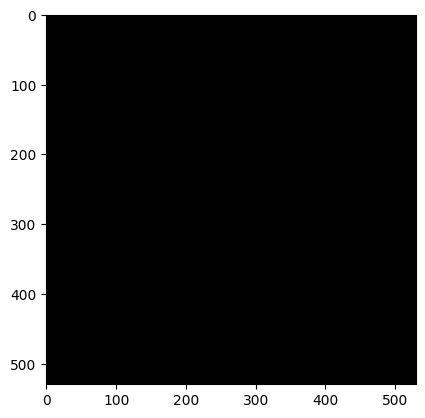

In [82]:
plt.imshow(destination_new_face)

### Image Rendering

In [83]:
for triangle_index in triangles_id:

    tr1_pt1 = points_list[triangle_index[0]]
    tr1_pt2 = points_list[triangle_index[1]]
    tr1_pt3 = points_list[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    rect1 = cv2.boundingRect(triangle1)
    (x1, y1, w1, h1) = rect1
    cropped_triangle = source[y1: y1 + h1, x1: x1 + w1]
    cropped_tr1_mask = np.zeros((h1, w1), np.uint8)
    points = np.array([[tr1_pt1[0] - x1, tr1_pt1[1] - y1],
                      [tr1_pt2[0] - x1, tr1_pt2[1] - y1],
                      [tr1_pt3[0] - x1, tr1_pt3[1] - y1]], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                       mask=cropped_tr1_mask)

    tr2_pt1 = points_list2[triangle_index[0]]
    tr2_pt2 = points_list2[triangle_index[1]]
    tr2_pt3 = points_list2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2 = cv2.boundingRect(triangle2)
    (x2, y2, w2, h2) = rect2
    cropped_triangle2 = destination[y2: y2 + h2, x2: x2 + w2]
    cropped_tr2_mask = np.zeros((h2, w2), np.uint8)
    points2 = np.array([[tr2_pt1[0] - x2, tr2_pt1[1] - y2],
                       [tr2_pt2[0] - x2, tr2_pt2[1] - y2],
                       [tr2_pt3[0] - x2, tr2_pt3[1] - y2]], np.int32)
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                       mask=cropped_tr2_mask)

    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w2, h2))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)


    destination_new_face_rect_area = destination_new_face[y2: y2 + h2, x2: x2 + w2]
    destination_new_face_rect_area_gray = cv2.cvtColor(destination_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    
    _, mask_triangles_designed = cv2.threshold(destination_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    destination_new_face_rect_area = cv2.add(destination_new_face_rect_area, warped_triangle)
    destination_new_face[y2: y2 + h2, x2: x2 + w2] = destination_new_face_rect_area

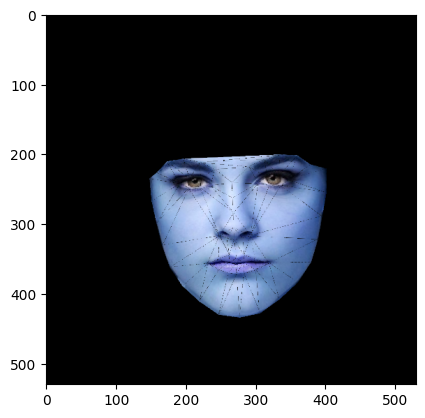

In [84]:
plt.imshow(destination_new_face)

In [85]:
destination_face_mask = np.zeros_like(destination_grey)
destination_head_mask = cv2.fillConvexPoly(destination_face_mask, convexhull2, 255)
destination_face_mask = cv2.bitwise_not(destination_head_mask)

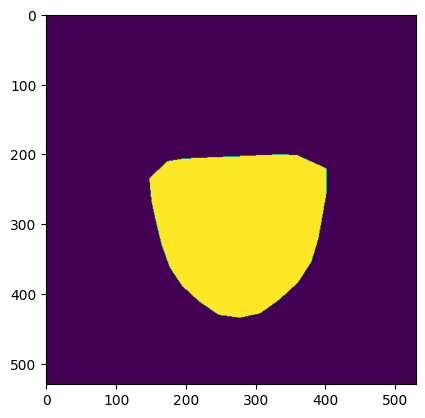

In [86]:
plt.imshow(destination_head_mask)

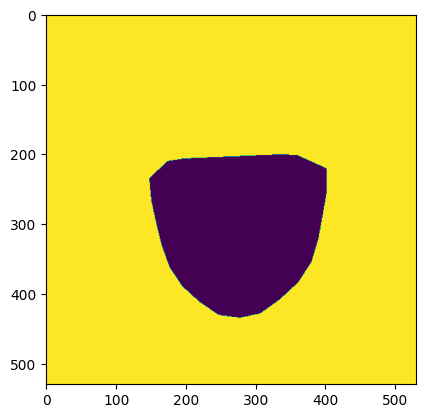

In [87]:
plt.imshow(destination_face_mask)

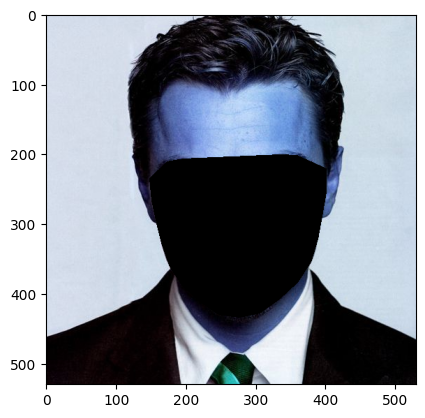

In [88]:
destination_noface = cv2.bitwise_and(destination, destination, mask=destination_face_mask)
plt.imshow(destination_noface)

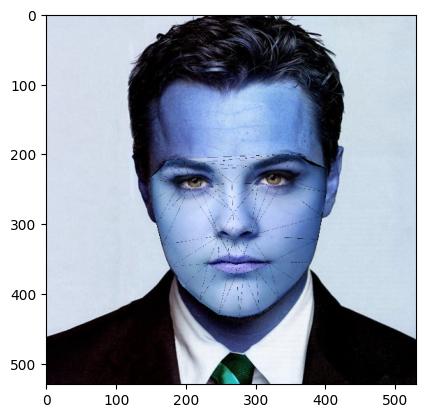

In [89]:
result = cv2.add(destination_noface, destination_new_face)
plt.imshow(result)

In [90]:
(x3, y3, w3, h3) = cv2.boundingRect(convexhull2)
center_face = (int((x3 + x3 + w3) / 2), int((y3 + y3 + h3) / 2))

In [91]:
center_face

(275, 318)

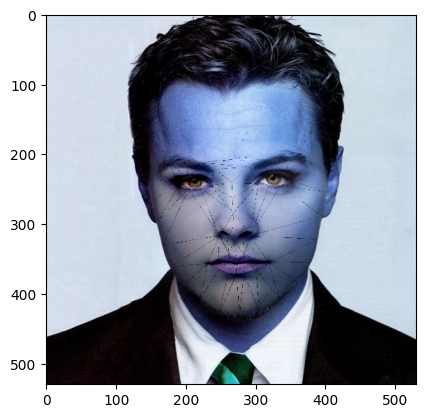

In [92]:
normal_clone = cv2.seamlessClone(result, destination, destination_head_mask, center_face, cv2.NORMAL_CLONE)
plt.imshow(normal_clone)

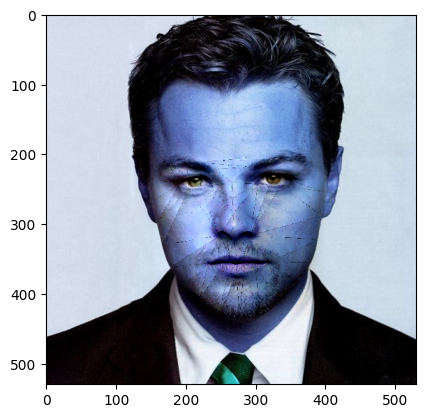

In [93]:
mixed_clone = cv2.seamlessClone(result, destination, destination_head_mask, center_face, cv2.MIXED_CLONE)
plt.imshow(mixed_clone)